# Import libraries and data file

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import plotly.express as px


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL, _extrapolate_trend
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA


In [92]:
# File is hourly productivity as a % change from the previous year

global_temps = pd.read_csv('data/GlobalTemperatures.csv', header=0)
global_temps

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
...,...,...
3187,8/1/2015,14.755
3188,9/1/2015,12.999
3189,10/1/2015,10.801
3190,11/1/2015,7.433


### Clean and separate into training and test sets

In [93]:
global_temps.dropna(inplace=True)
global_temps['dt'] = pd.to_datetime(global_temps['dt'], format='mixed')
global_temps.set_index(['dt'], inplace=True)
global_temps.dtypes


LandAverageTemperature    float64
dtype: object

In [94]:
# It's a lot of data and the earlier data seems a bit suspect,
# so let's begin on Jan 01, 1800
global_temps_train = global_temps['1800-01-01':'2014-01-01']
global_temps_test = global_temps['2014-01-01':]
#global_temps_test

In [ ]:

#Additive seasonal decompose, mult not appropriate due to 0 or negative values
global_temps_additive = seasonal_decompose(global_temps_train, model='additive', period=12)

global_temps_stl = STL(global_temps_train, period = 12)
global_temps_model = global_temps_stl.fit()

global_temps_forecast = STLForecast(global_temps_train, ARIMA, model_kwargs={'order':(1, 1, 0), 'trend':"t"})
global_temps_predictor = global_temps_forecast.fit()
# to predict future results, call
# global_temps_predictor.forecast(len(global_temps_test)) ,
# where len(...) is the number of increments you'd like to predict


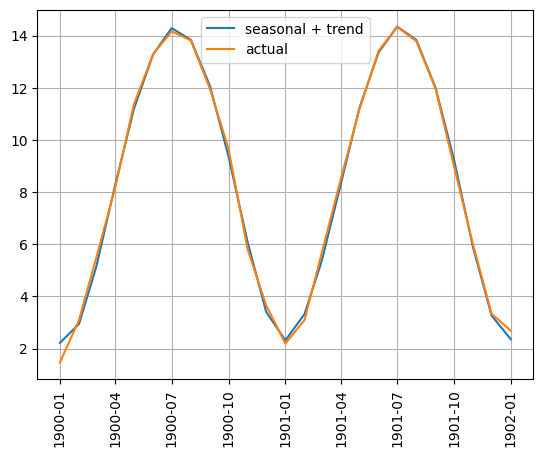

In [105]:
season_and_trend = global_temps_model.seasonal + global_temps_model.trend

plt.plot(season_and_trend['1900-01-01':'1902-01-01'], label = 'seasonal + trend')
plt.plot(global_temps_train['1900-01-01':'1902-01-01'], label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90);

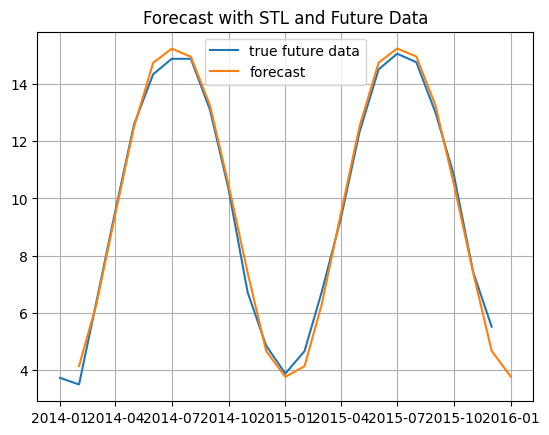

In [108]:
plt.plot(global_temps_test, label = 'true future data')
plt.plot(global_temps_predictor.forecast(len(global_temps_test)), label = 'forecast')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();

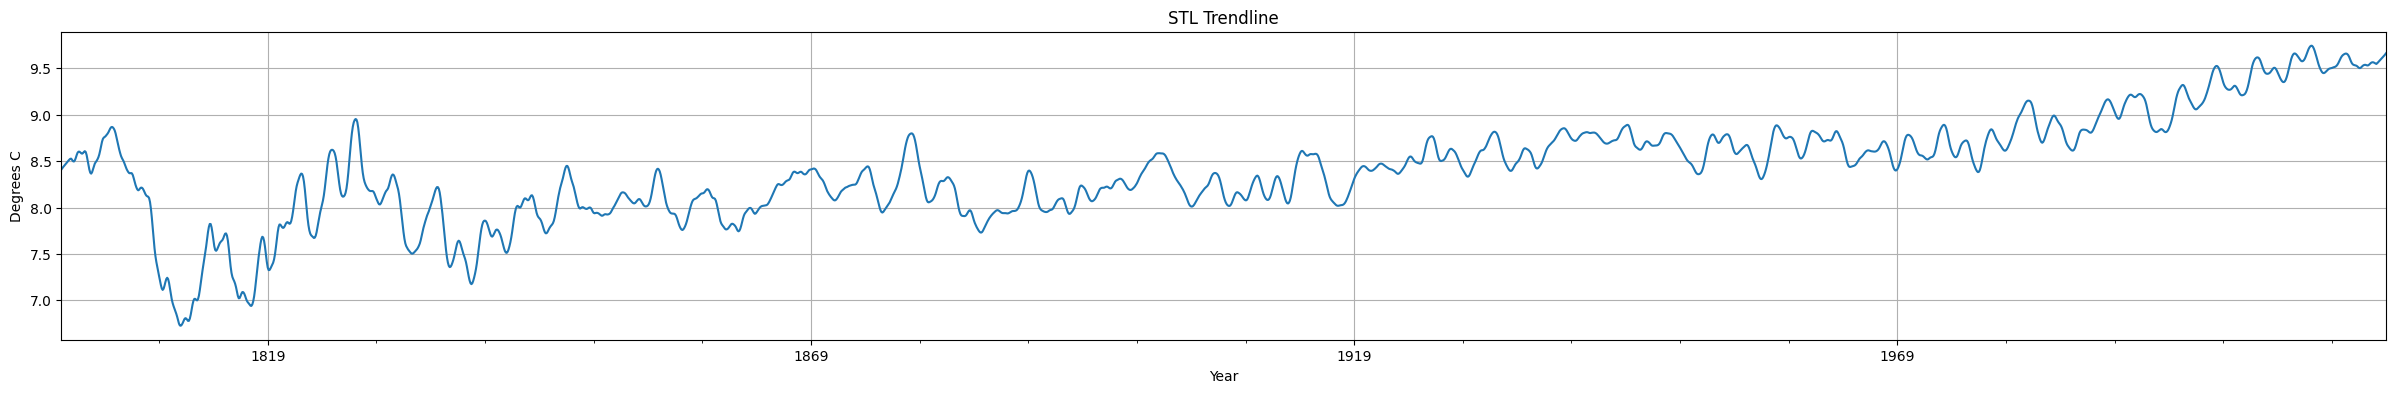

In [102]:
global_temps_model.trend.plot(figsize=(30,4))
plt.title('STL Trendline')
plt.xlabel('Year')
plt.ylabel('Degrees C')
plt.grid()

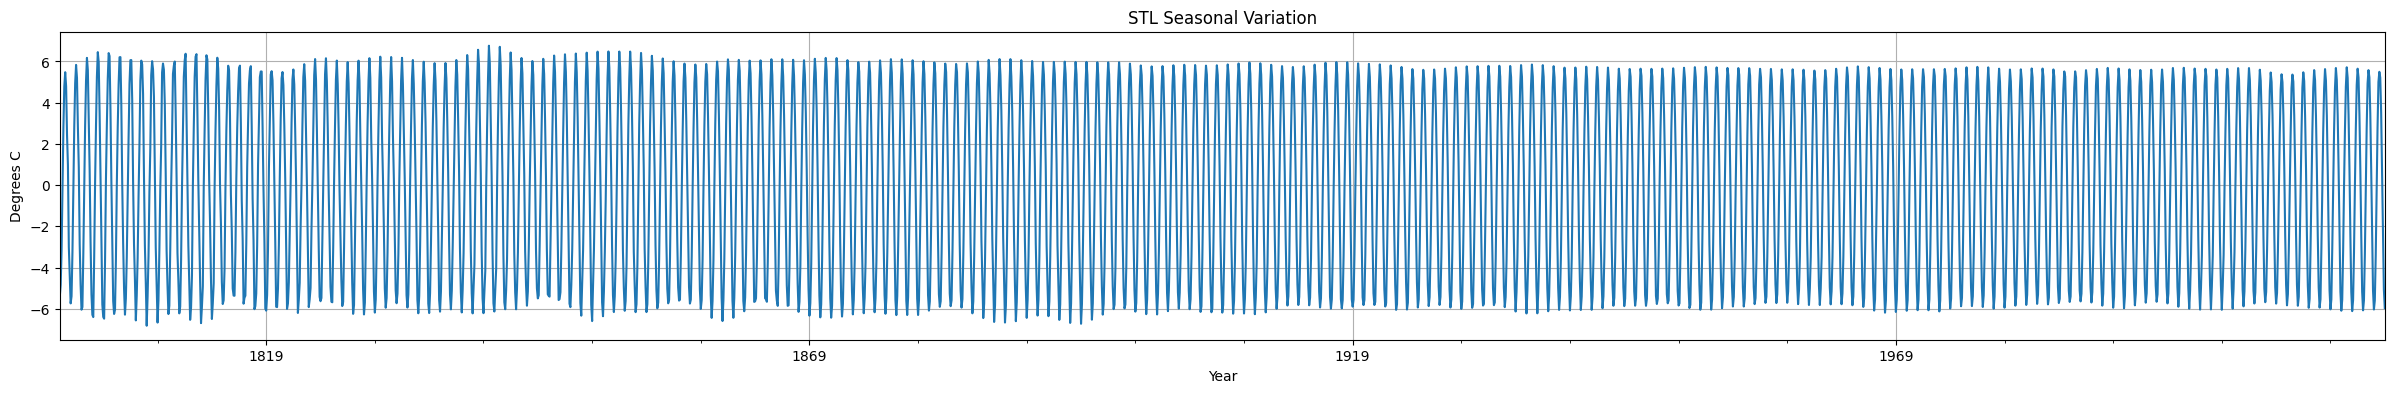

In [103]:
global_temps_model.seasonal.plot(figsize=(30,4))
plt.title('STL Seasonal Variation')
plt.xlabel('Year')
plt.ylabel('Degrees C')
plt.grid()

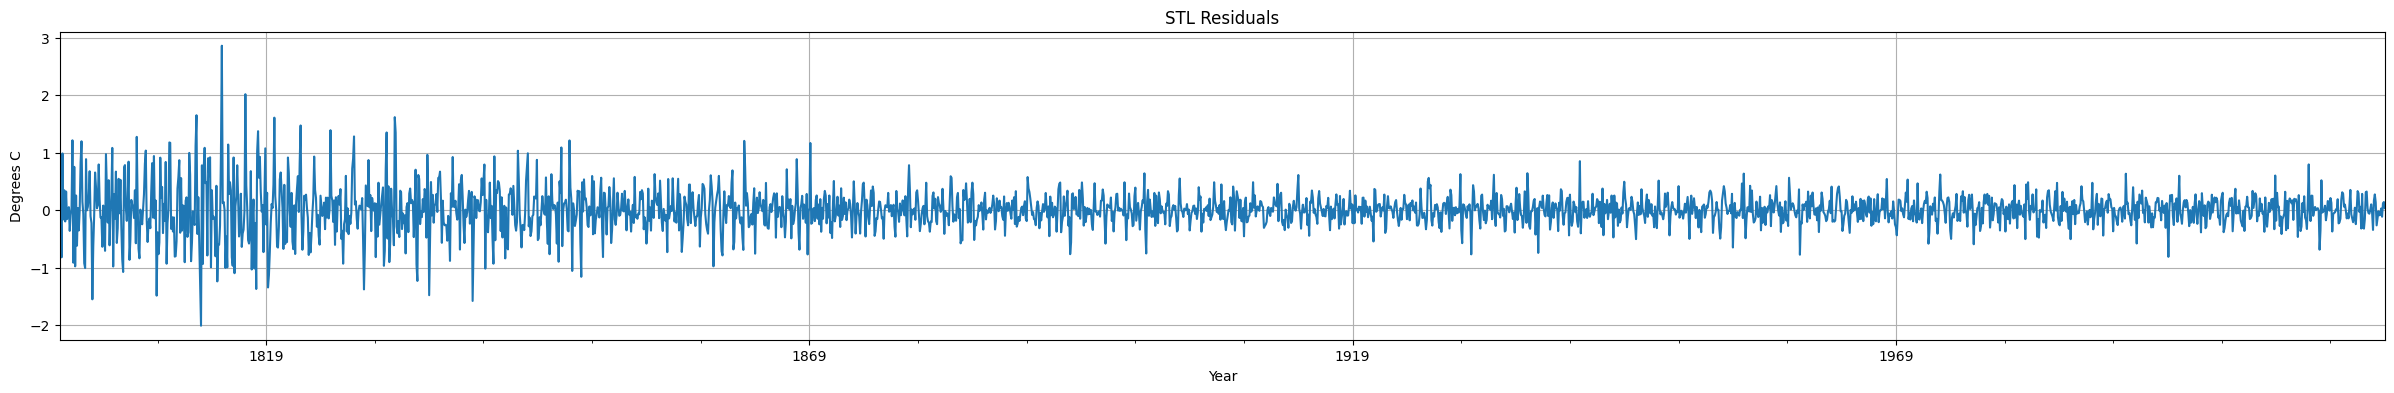

In [104]:
global_temps_model.resid.plot(figsize=(30,4))
plt.title('STL Residuals')
plt.xlabel('Year')
plt.ylabel('Degrees C')
plt.grid()

# Global Average Temperature - Additive Model

Text(0, 0.5, 'Degrees C')

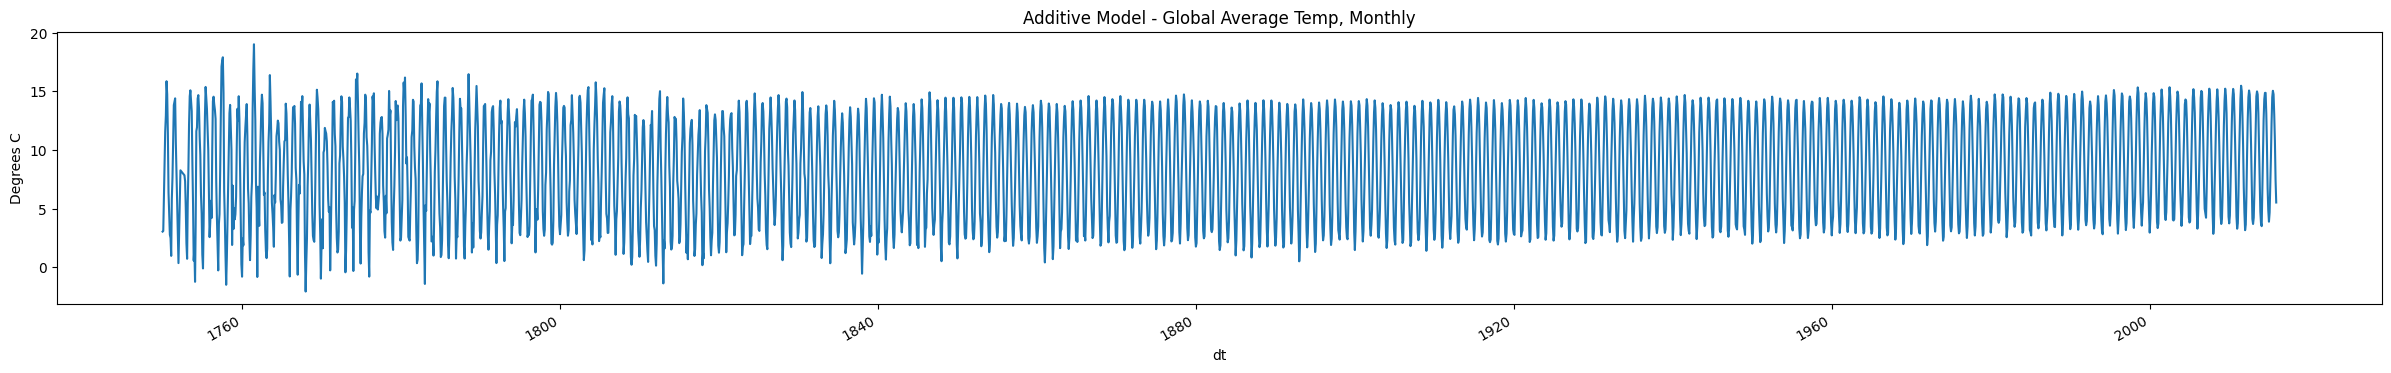

In [58]:
global_temps_additive.observed.plot(figsize=(30,4))
plt.title('Additive Model - Global Average Temp, Monthly')
plt.ylabel('Degrees C')

Text(0, 0.5, 'Degrees C')

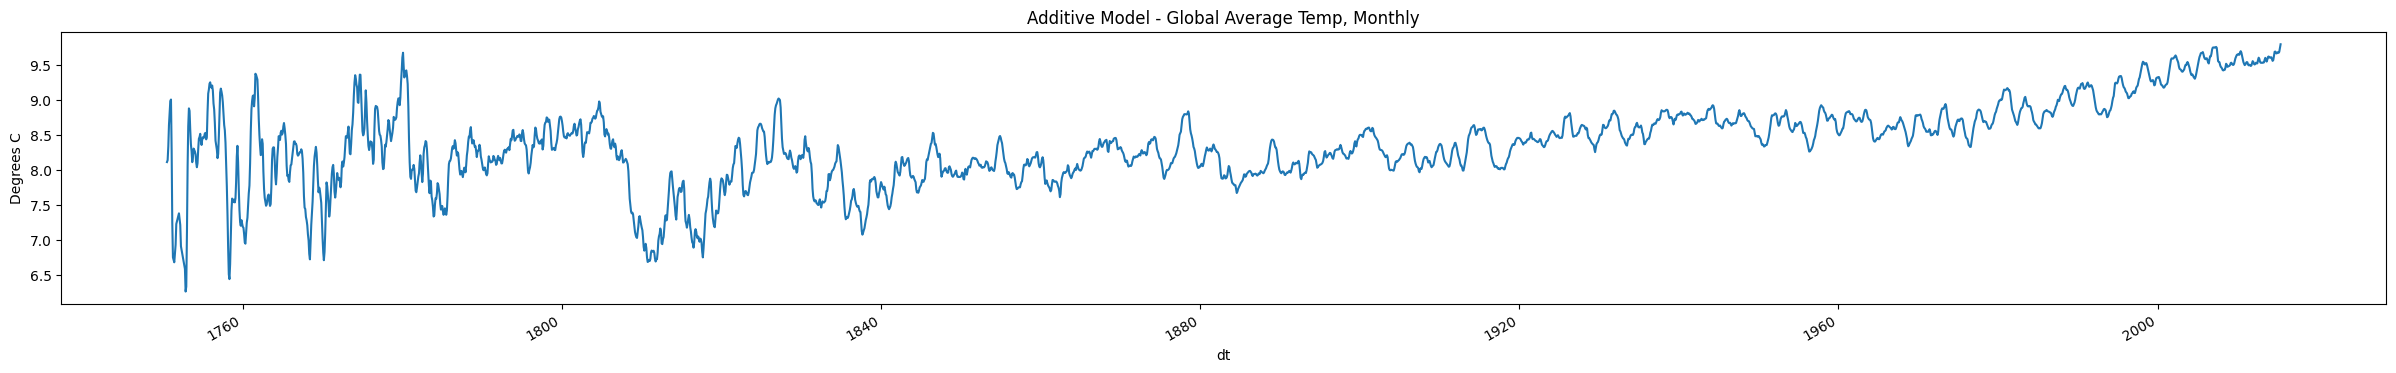

In [59]:
global_temps_additive.trend.plot(figsize=(30,4))
plt.title('Additive Model - Global Average Temp, Monthly')
plt.ylabel('Degrees C')

Text(0, 0.5, 'Degrees C')

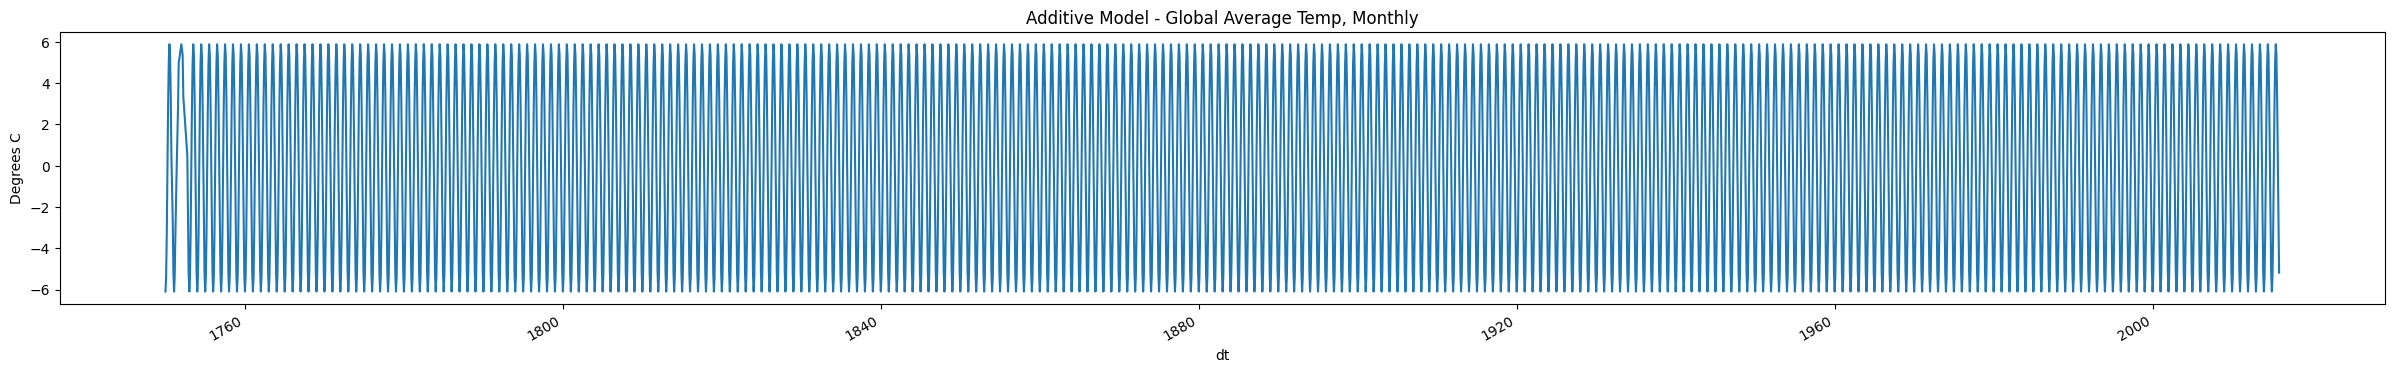

In [60]:
global_temps_additive.seasonal.plot(figsize=(30,4))
plt.title('Additive Model - Global Average Temp, Monthly')
plt.ylabel('Degrees C')

Text(0, 0.5, 'Degrees C')

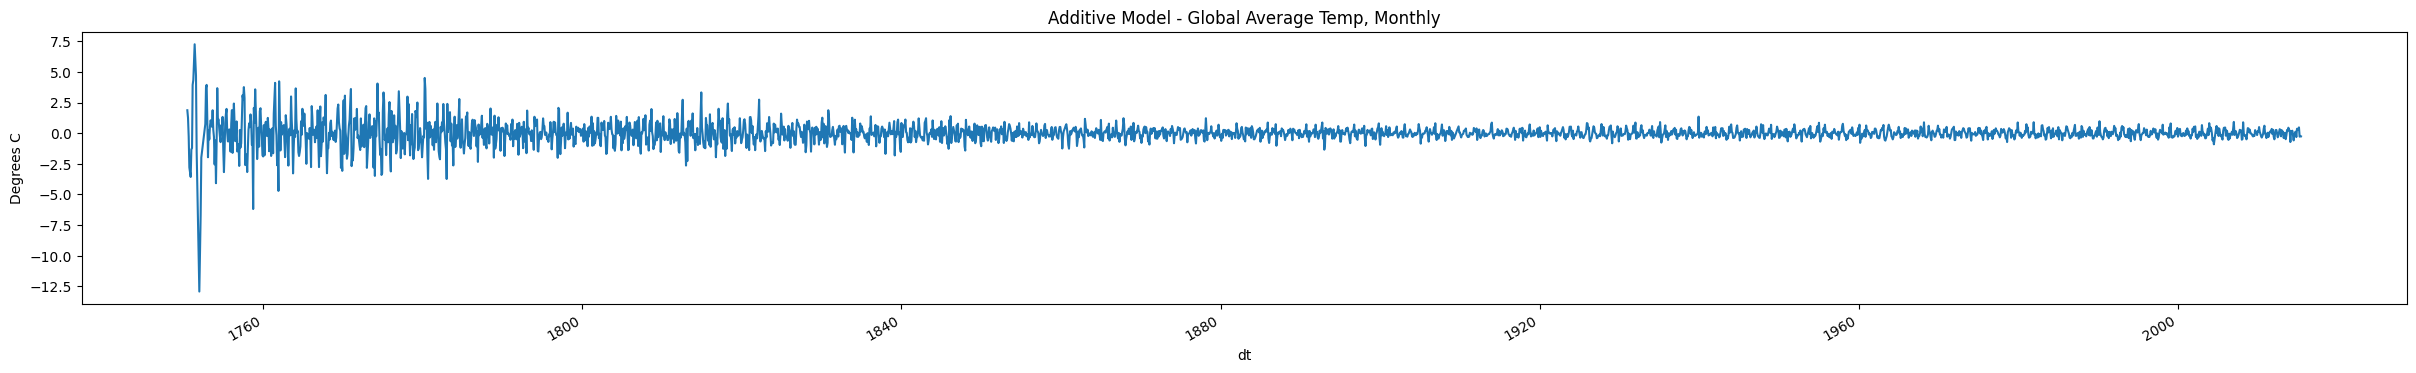

In [61]:
global_temps_additive.resid.plot(figsize=(30,4))
plt.title('Additive Model - Global Average Temp, Monthly')
plt.ylabel('Degrees C')

In [ ]:
#instantiate
stlf = STLForecast(y_hist, ARIMA, model_kwargs={'order':(1, 1, 0), 'trend':"t"})
#fit model using historical data
stlf_results = stlf.fit()
#produce forecast for future data
forecast = stlf_results.forecast(len(y_future))



In [64]:
#instantiate
stlf = STLForecast(global_temps, ARIMA, model_kwargs={'order':(1, 1, 0), 'trend':"t"}, period=12)
#fit model using historical data
stlf_results = stlf.fit()
#produce forecast for future data
forecast = stlf_results.forecast(20)

c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No suppor

In [65]:
forecast

3180     4.300714
3181     4.680991
3182     7.001884
3183     9.708231
3184    12.773914
3185    14.801939
3186    15.241226
3187    15.072035
3188    13.345321
3189    10.854990
3190     7.445351
3191     5.523903
3192     4.308645
3193     4.688284
3194     7.009378
3195     9.715661
3196    12.781364
3197    14.809383
3198    15.248672
3199    15.079480
dtype: float64

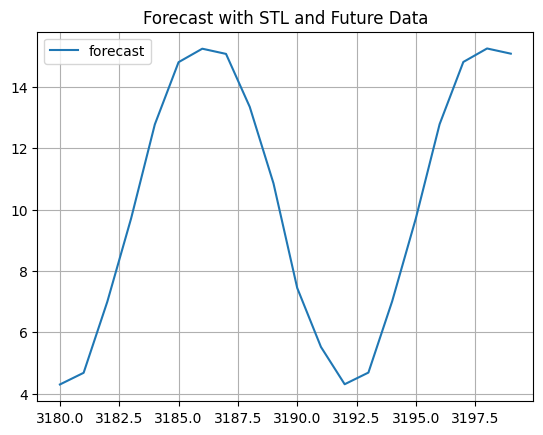

In [66]:
#plt.plot(temp[-20:], label = 'true future data')
plt.plot(forecast, label = 'forecast')
#plt.plot(y_hist['1993':], label = 'training data')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();

In [130]:
pred_error = temp[-20:] - forecast
mae = np.abs(pred_error).mean()
rmse = np.sqrt((pred_error**2).mean())

In [131]:
mae

Temperature           NaN
2017-12-31 00:00:00   NaN
2017-12-31 00:10:00   NaN
2017-12-31 00:20:00   NaN
2017-12-31 00:30:00   NaN
2017-12-31 00:40:00   NaN
2017-12-31 00:50:00   NaN
2017-12-31 01:00:00   NaN
2017-12-31 01:10:00   NaN
2017-12-31 01:20:00   NaN
2017-12-31 01:30:00   NaN
2017-12-31 01:40:00   NaN
2017-12-31 01:50:00   NaN
2017-12-31 02:00:00   NaN
2017-12-31 02:10:00   NaN
2017-12-31 02:20:00   NaN
2017-12-31 02:30:00   NaN
2017-12-31 02:40:00   NaN
2017-12-31 02:50:00   NaN
2017-12-31 03:00:00   NaN
2017-12-31 03:10:00   NaN
dtype: float64